In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from pylab import*
import time as tm

In [2]:
#caractéristique physique 
c=340 #m.s^-1   célérité de l'onde

#Paramètres discrétisation de l'espace - maillage spatiale - indice i
L=0.5  #Longueur de la corde en m
dx=0.0005 #pas entre deux points de l'espace
Nx=int(L/dx) #Nombre de points de l'espace
X=linspace(0,L,Nx)
dxe=dx

#Paramètre de discrétisation du temps -maillage temporel - indice n
Duree=0.001  #Durée de la mesure de l'onde en seconde
dt=dx/c  #pas dans le temps
Nt=int(Duree//dt)  #Nombre de points dans l'espace
T=linspace(0,Duree,Nt)
dte=dt

#Conditions aux limites
u0l=0     
unl=0

#Parametre de calcul
alpha =(c*dt/dx)    
MODE=3 #Nombre de modes spatiaux


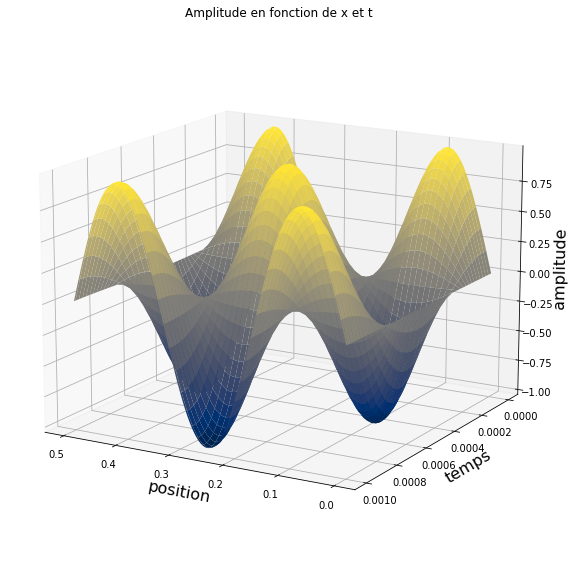

In [3]:
###Solution exacte
Teuler=T
Xeuler=X

def fonction(x,t):
    #Applique la fonction d'onde à un entier ou un array
    
    return cos((MODE*pi*c/L)*(t*dt))*sin((MODE*pi/L)*(x*dx))
    
#Création de la matrice U des résultats
SolE=zeros((Nx,Nt),float)

x=0
t=0
while (t<Nt):
    x=0
    while(x<Nx):
        SolE[x,t]=fonction(x,t)
        x+=1
    t+=1

#Affichage de la solution exacte
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('position', fontsize = 16)
ax.set_ylabel('temps', fontsize = 16)
ax.set_zlabel('amplitude', fontsize = 16)
ax.view_init(elev = 15, azim = 120)
plt.title("Amplitude en fonction de x et t")
ST,SX = meshgrid(T,X)
p = ax.plot_surface(SX,ST,SolE,cmap = 'cividis')       
plt.show()

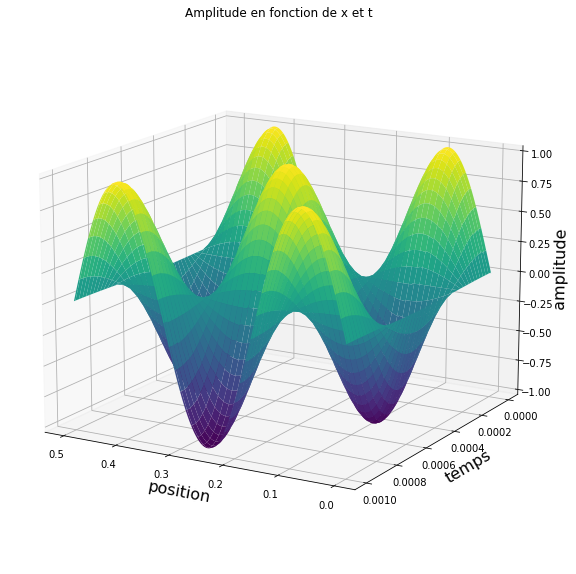

In [4]:
### Euler explicite


#Fonctions des conditions initiales
def y0x(i):
  """int -> float
  Fonction de condition initiale y(0,x)
  onde sinusoïdale"""
  return sin((MODE*pi/L)*(i*dx))

def y0x2(i):
  """int -> float
  Fonction de condition initiale
  onde pincée triangulaire"""

  if((i*dx)<=x0):
    return 2*(i*dx)/x0
  
  else:
    return 2*(L-i*dx)/(L-x0)


def y0x3(i):
    """int -> float
  Fonction de condition initiale
    Corde pincée triangulaire"""
    
    return 2*(i*dx)*(L-i*dx)/(x0*L)

def dy0x(i):
  """int ->float
  Fonction de condition initiale d(0,x)"""
  return 0

#Création de la matrice tridiagonale  
def M(n):
  """int -> array(n,n)
 Renvoie matrice diagonale de dimension n*n contenant les coefficients du systeme"""

  M = zeros((n,n),float)

  for i in range(0,n):
    if(i==0):                                   #pour la première ligne de la matrice
      M[i,i], M[i,i+1]=(2-2*alpha**2),alpha**2
    elif(i==n-1):
      M[i,i-1], M[i,i]=alpha**2,(2-2*alpha**2)
    else:                                       #Pour la dernière ligne de la matrice
      M[i,i-1], M[i,i], M[i,i+1] = alpha**2,(2-2*alpha**2),alpha**2

  return M

###Fonctions des conditions initiales de la matrices

#Initialise la matrice colonne avec les valeurs à l'état initial t=0
#Ici,on considère que U(x,0)=sin(x)
def init_U0(n,y):
  """int -> array(n,1)
  Retourne une matrice colonne composée des valeurs de l'onde à l'état initial t=0 """

  U0=zeros((n,1),float)

  for i in range(0,n):
    U0[i,0]=y(i)
  #U0[n-1,0]=0
  return U0


#Initialise la matrice colonne avec les valeurs à l'état t=1 
def init_U1(n,dy,y):
  """int -> array(n,1)
  Retourne une matrice colonne composée des valeurs de l'onde à l'état initial t=1 """
  #Initialisation des tableaux
  U0=init_U0(n,y)
  U1=zeros((n,1),float)

  for i in range (1,n-1):
    U1[i]= dt*dy(i) + U0[i]
  #U1[0]=U1[n-1]=0.0 #Conditions initiales à modifier 
  
  return U1

##############################################################################################


#Création de la matrice triagonale D
D=M(Nx)

#Création de la matrice U des résultats
Uexp=zeros((Nx,Nt),float)

#Conditions initiales
U0=init_U0(Nx,y0x)
U1=init_U1(Nx,dy0x,y0x)
Uexp[:,[0]]=U0
Uexp[:,[1]]=U1


#Matrices des conditions limites
Cl=zeros((Nx,1),float)
Cl[0]=u0l
Cl[Nx-1]=unl

#Calcul du reste des valeurs
for j in range(1,Nt-1):
  Uexp[:,[j+1]]=dot(D,Uexp[:,[j]])-Uexp[:,[j-1]]+Cl


#Affichage de la solution Sans animation
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('position', fontsize = 16)
ax.set_ylabel('temps', fontsize = 16)
ax.set_zlabel('amplitude', fontsize = 16)
ax.view_init(elev = 15, azim = 120)
plt.title("Amplitude en fonction de x et t")
ST,SX = meshgrid(T,X)
p = ax.plot_surface(SX,ST,Uexp,cmap = 'viridis')       
plt.show()


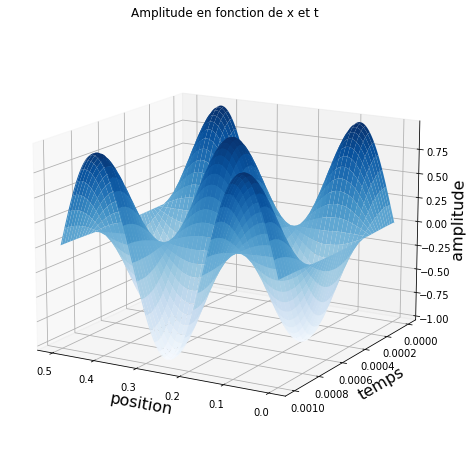

In [5]:
#Euler Implicite

#Fonctions des conditions initiales
def y0x(i):
  """int -> float
  Fonction de condition initiale y(0,x)
  onde sinusoïdale"""
  return sin((MODE*pi/L)*(i*dx))

def y0x2(i):
  """int -> float
  Fonction de condition initiale
  onde pincée triangulaire"""

  if((i*dx)<=x0):
    return 2*(i*dx)/x0
  
  else:
    return 2*(L-i*dx)/(L-x0)


def y0x3(i):
    """int -> float
  Fonction de condition initiale
    Corde pincée triangulaire"""
    
    return 2*(i*dx)*(L-i*dx)/(x0*L)

def dy0x(i):
  """int ->float
  Fonction de condition initiale d(0,x)"""
  return 0

#Création de la matrice A inversible
def A(n):
  """int -> array(n,n)
 Renvoie matrice diagonale de dimension n*n contenant les coefficients du systeme"""

  A = zeros((n,n),float)

  for i in range(0,n):
    if(i==0):                                   #pour la première ligne de la matrice
      A[i,i], A[i,i+1]=(alpha**2)+1/2,-(alpha**2)/2
    elif(i==n-1):                               #Pour la dernière ligne de la matrice
      A[i,i-1], A[i,i]=-(alpha**2)/2,(alpha**2)+1/2
    else:                                       
      A[i,i-1], A[i,i], A[i,i+1] = -(alpha**2)/2,(alpha**2)+1/2,-(alpha**2)/2
  return A


#Création de la matrice U0 à valeur initiale
def init_U0(n,y):
  """int -> array(n,1)
  Retourne une matrice colonne composée des valeurs de l'onde à l'état initial t=0 """

  U0=zeros((n,1),float)

  for i in range(0,n):
    U0[i,0]=y(i)
  U0[n-1,0]=0
  return U0

#Initialise la matrice colonne avec les valeurs à l'état t=1 
def init_U1(n,dy,y):
  """int -> array(n,1)
  Retourne une matrice colonne composée des valeurs de l'onde à l'état initial t=1 """
  #Initialisation des tableaux
  U0=init_U0(n,y)
  U1=zeros((n,1),float)

  for i in range (1,n-1):
    U1[i]= dt*dy(i) + U0[i]
  U1[0]=U1[n-1]=0.0 #Conditions initiales à modifier 
  
  return U1

##########################################################################################

#Création de la matrice U des résultats
Uimp=zeros((Nx,Nt),float)

#Conditions initiales
Uimp[:,[0]]=init_U0(Nx,y0x)
Uimp[:,[1]]=init_U1(Nx,dy0x,y0x)

# Inverse de la matrice A
InvA = linalg.inv(A(Nx))

#Calcul du reste des valeurs
for j in range(1,Nt-1):
  Sum = Uimp[:,[j]] - 1/2 * Uimp[:,[j-1]]
  Uimp[:,[j+1]] = dot(InvA, Sum)
    
# GRAPHIQUE AMPLITUDE EN FONCTION DU TEMPS, EN FONCTION DE LA POSITION
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('position', fontsize = 16)
ax.set_ylabel('temps', fontsize = 16)
ax.set_zlabel('amplitude', fontsize = 16)
ax.view_init(elev = 15, azim = 120)
plt.title("Amplitude en fonction de x et t")
ST,SX = meshgrid(T,X)
p = ax.plot_surface(SX,ST,Uimp,cmap = 'Blues')       
plt.show()


100
1000
t= 1
t= 2
t= 3
t= 4
t= 5
t= 6
t= 7
t= 8
t= 9
t= 10
t= 11
t= 12
t= 13
t= 14
t= 15
t= 16
t= 17
t= 18
t= 19
t= 20
t= 21
t= 22
t= 23
t= 24
t= 25
t= 26
t= 27
t= 28
t= 29
t= 30
t= 31
t= 32
t= 33
t= 34
t= 35
t= 36
t= 37
t= 38
t= 39
t= 40
t= 41
t= 42
t= 43
t= 44
t= 45
t= 46
t= 47
t= 48
t= 49
t= 50
t= 51
t= 52
t= 53
t= 54
t= 55
t= 56
t= 57
t= 58
t= 59
t= 60
t= 61
t= 62
t= 63
t= 64
t= 65
t= 66
t= 67
t= 68
t= 69
t= 70
t= 71
t= 72
t= 73
t= 74
t= 75
t= 76
t= 77
t= 78
t= 79
t= 80
t= 81
t= 82
t= 83
t= 84
t= 85
t= 86
t= 87
t= 88
t= 89
t= 90
t= 91
t= 92
t= 93
t= 94
t= 95
t= 96
t= 97
t= 98
t= 99
t= 100
t= 101
t= 102
t= 103
t= 104
t= 105
t= 106
t= 107
t= 108
t= 109
t= 110
t= 111
t= 112
t= 113
t= 114
t= 115
t= 116
t= 117
t= 118
t= 119
t= 120
t= 121
t= 122
t= 123
t= 124
t= 125
t= 126
t= 127
t= 128
t= 129
t= 130
t= 131
t= 132
t= 133
t= 134
t= 135
t= 136
t= 137
t= 138
t= 139
t= 140
t= 141
t= 142
t= 143
t= 144
t= 145
t= 146
t= 147
t= 148
t= 149
t= 150
t= 151
t= 152
t= 153
t= 154
t= 155
t= 156
t= 157


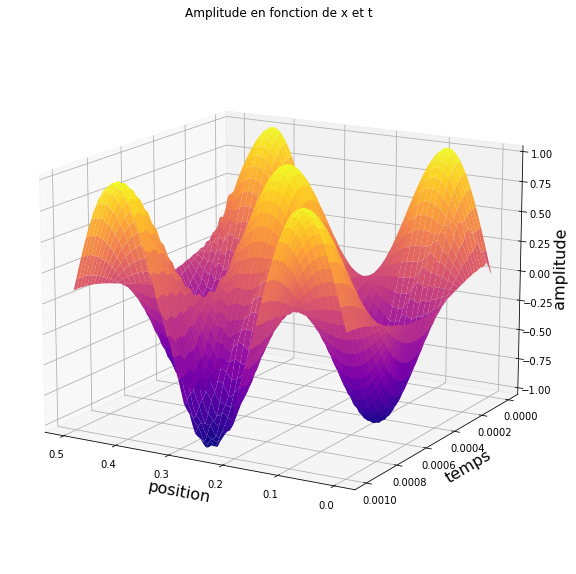

In [6]:

"""Parametres de discrétisation/Résolution"""
#caractéristique physique 
c=340 #m.s^-1   célérité de l'onde

#Paramètres discrétisation de l'espace - maillage spatiale - indice i
L=0.5 #Longueur de la corde en m
dx=0.005 #pas entre deux points de l'espace
Nx=int(L/dx) #Nombre de points de l'espace
X=linspace(0,L,Nx)

#Paramètre de discrétisation du temps -maillage temporel - indice n
Duree=0.001  #Durée de la mesure de l'onde en seconde
dt=0.000001  #pas dans le temps
Nt=int(Duree/dt)  #Nombre de points dans l'espace
T=linspace(0,Duree,Nt)

#Caractéristique spec
alpha=(c/dx)**2

#Conditions aux limites
u0l=0     
unl=0

MODE=3 #Nombre de modes spatiaux

x0=L/2

#########################################################################################

"""Initialisation des conditions initiales"""
#Fonctions des conditions initiales
def y0x(i):
  """int -> float
  Fonction de condition initiale y(0,x)
  onde sinusoïdale"""
  return sin((MODE*pi/L)*(i*dx))

def y0x2(i):
  """int -> float
  Fonction de condition initiale
  onde pincée triangulaire"""

  if((i*dx)<=x0):
    return 2*(i*dx)/x0
  
  else:
    return 2*(L-i*dx)/(L-x0)


def y0x3(i):
    """int -> float
  Fonction de condition initiale
    Corde pincée triangulaire"""
    
    return 2*(i*dx)*(L-i*dx)/(x0*L)


#Initialise la matrice colonne avec les valeurs à l'état initial t=0
#Ici,on considère que U(x,0)=sin(x)
def init_U0(n):
  """int -> array(n,1)
  Retourne une matrice colonne composée des valeurs de l'onde à l'état initial t=0 """

  U0=zeros((n,1),float)

  for i in range(0,n):
    U0[i,0]=y0x(i)
  U0[n-1,0]=0
  return U0
  

#Initialise la matrice colonne avec les conditions initiales de dU/dt en t=0
def init_dU0(n):
    """int -> array(n,1)
    Retourne une matrice colonne composée des valeurs de la dérivée de la fonction d'onde à l'état initial t=0"""
    
    dU0=zeros((n,1),float)
    
    for i in range(0,n):
        dU0[i,0]=0
    
    #U0[n-1,0]=0
    return dU0


"""Définition des fonctions f et g"""
def f(n,i,U):
    """int + int + array(n,1) -> float
    Retourne la valeur de f(n,i,U)"""
    
    if(i==0):
        return alpha* (u0l - 2*U[i,0] + U[i+1,0])
    
    elif(i==n-1):
        return alpha* (U[i-1,0] - 2*U[i,0] + unl)
        
    else:
        return alpha* (U[i-1,0] - 2*U[i,0] + U[i+1,0] )
    
def g(z):
    """float -> float
    Retourne la valeur de g(n,i,U)=g(z)=z"""
    
    return z
 
 
#FONCTIONS F ET G
def K0i(i,U,Z):
    """int + array(Nx,1) + array(Nx,1)-> float"""
    
    return dt*Z[i,0]
    
def L0i(i,U,Z):
    """int + array(Nx,1) + array(Nx,1)-> float"""
    
    return dt*f(Nx,i,U)
    
def K1i(i,U,Z):
    """int + array(Nx,1) + array(Nx,1)-> float"""
    
    return dt*(Z[i,0] + 1/2*L0i(i,U,Z))
    
def L1i(i,U,Z):
    """int + array(Nx,1) + array(Nx,1)-> float"""
    if(i==0):
        T=alpha* (u0l - 2*(U[i,0] +1/2*K0i(i,U,Z))  + (U[i+1,0]+1/2*K0i(i+1,U,Z)))
        
    elif(i==Nx-1):
        T= alpha* ((U[i-1,0]+1/2*K0i(i-1,U,Z)) - 2*(U[i,0]+1/2*K0i(i,U,Z)) + unl)
        
    else:
        T= alpha* ((U[i-1,0]+1/2*K0i(i-1,U,Z)) - 2*(U[i,0]+1/2*K0i(i,U,Z)) + (U[i+1,0]+1/2*K0i(i+1,U,Z)) )
    
    return dt*T
   
def K2i(i,U,Z):
    """int + array(Nx,1) + array(Nx,1)-> float"""
    
    return dt*(Z[i,0] + 1/2*L1i(i,U,Z))

def L2i(i,U,Z):
    """int + array(Nx,1) + array(Nx,1)-> float"""
    if(i==0):
        T=alpha* (u0l - 2*(U[i,0] +1/2*K1i(i,U,Z))  + (U[i+1,0]+1/2*K1i(i+1,U,Z)) )
        
    elif(i==Nx-1):
        T= alpha* ((U[i-1,0]+1/2*K1i(i-1,U,Z)) - 2*(U[i,0]+1/2*K1i(i,U,Z)) + unl)
        
    else:
        T= alpha* ((U[i-1,0]+1/2*K1i(i-1,U,Z)) - 2*(U[i,0]+1/2*K1i(i,U,Z)) + (U[i+1,0]+1/2*K1i(i+1,U,Z)) )
    
    return dt*T
    
def K3i(i,U,Z):
    """int + array(Nx,1) + array(Nx,1)-> float"""
    
    return dt*(Z[i,0] + L2i(i,U,Z) )   
 
def L3i(i,U,Z):
    """int + array(Nx,1) + array(Nx,1)-> float"""
    if(i==0):
        T=alpha* (u0l+ - 2*(U[i,0] +K1i(i,U,Z))  + (U[i+1,0]+K1i(i+1,U,Z)) )
        
    elif(i==Nx-1):
        T= alpha* ((U[i-1,0]+K2i(i-1,U,Z)) - 2*(U[i,0]+K2i(i,U,Z)) + unl)
        
    else:
        T= alpha* ((U[i-1,0]+K2i(i-1,U,Z)) - 2*(U[i,0]+K2i(i,U,Z)) + (U[i+1,0]+K2i(i+1,U,Z)) )
    
    return dt*T

#######################################################################################################

start=tm.process_time()
 
#Création de la matrice résultat
U=zeros((Nx,Nt),float)
U[:,[0]]=init_U0(Nx)

z=zeros((Nx,Nt),float)
z[:,[0]]=init_dU0(Nx)

#Paramètres d'itération
t=1
i=0

print(Nx)
print(Nt)
tm.sleep(1)

while(t<Nt):
    i=0
    
    while(i<Nx):
        #calculs de k0 et l0
        k0,l0=K0i(i,U[:,[t-1]],z[:,[t-1]]) , L0i(i,U[:,[t-1]],z[:,[t-1]])
        #print("k0=",k0,"l0=",l0)
        #calculs de k1 et l1
        k1,l1=K1i(i,U[:,[t-1]],z[:,[t-1]]), L1i(i,U[:,[t-1]],z[:,[t-1]])

        #calculs de k2 et l2
        k2,l2=K2i(i,U[:,[t-1]],z[:,[t-1]]), L2i(i,U[:,[t-1]],z[:,[t-1]])
        
        #calculs de k3 et l3
        k3,l3=K3i(i,U[:,[t-1]],z[:,[t-1]]), L3i(i,U[:,[t-1]],z[:,[t-1]])
        #print("k3=",k3,"l3=",l3)
        #Calculs de u et de z pour i et t
        U[i,t]=U[i,t-1]+ 1/6*(k0 + 2*k1 + 2*k2 + k3)
        z[i]=z[i,t-1]+ 1/6*(l0 + 2*l1 + 2*l2 + l3)
        
        i+=1
        #pdb.set_trace()
    print("t=",t)
    t+=1
     

end=tm.process_time()
print("Le temps d'exécution est de ",end-start,"secondes")

#############################################################################################

# Affichage de la solution Sans animation
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('position', fontsize = 16)
ax.set_ylabel('temps', fontsize = 16)
ax.set_zlabel('amplitude', fontsize = 16)
ax.view_init(elev = 15, azim = 120)
plt.title("Amplitude en fonction de x et t")

ST,SX = meshgrid(T,X)
p = ax.plot_surface(SX,ST,U,cmap = 'plasma')       
plt.show()


Trk=T
Xrk=X
###Solution exacte
def fonction(x,t):
    #Applique la fonction d'onde à un entier ou un array
    
    return cos((MODE*pi*c/L)*(t*dt))*sin((MODE*pi/L)*(x*dx))
    
#Création de la matrice U des résultats
Solrk=zeros((Nx,Nt),float)

x=0
t=0
while (t<Nt):
    x=0
    while(x<Nx):
        Solrk[x,t]=fonction(x,t)
        x+=1
    t+=1
    

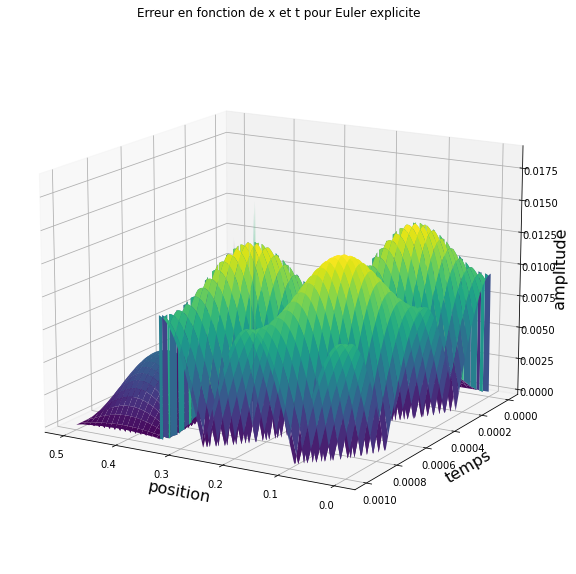

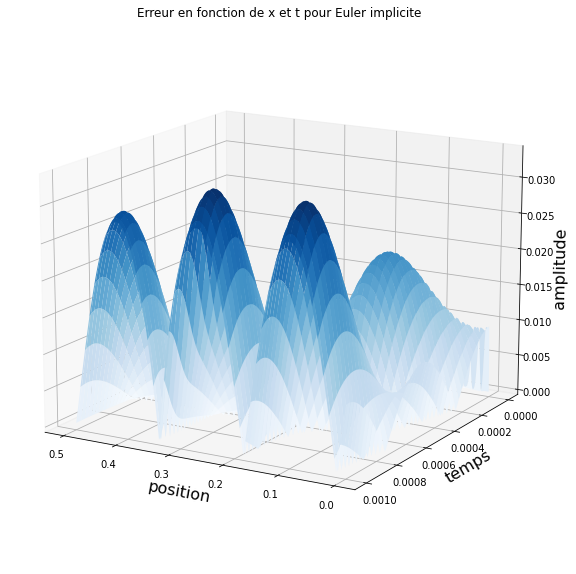

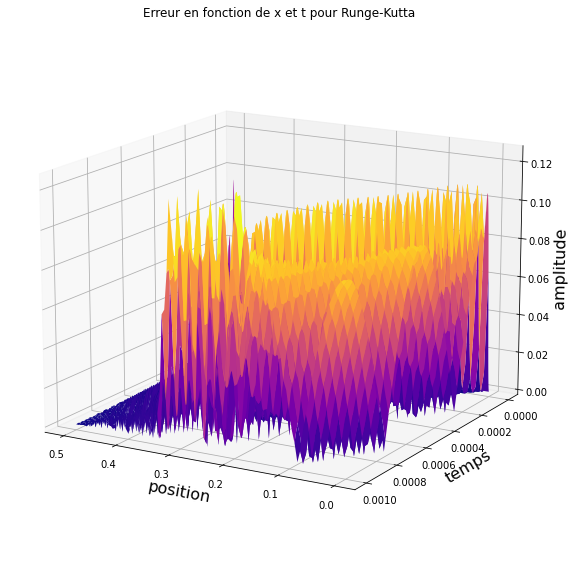

In [7]:
#Calculs d'erreurs
Eexp=np.abs(Uexp-SolE)
Eimp=np.abs(Uimp-SolE)
Erk=np.abs(U-Solrk)

#Affichage de l'Erreur
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('position', fontsize = 16)
ax.set_ylabel('temps', fontsize = 16)
ax.set_zlabel('amplitude', fontsize = 16)
ax.view_init(elev = 15, azim = 120)
plt.title("Erreur en fonction de x et t pour Euler explicite")
ST,SX = meshgrid(Teuler,Xeuler)
p = ax.plot_surface(SX,ST,Eexp,cmap = 'viridis')       
plt.show()

#Affichage de l'Erreur
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('position', fontsize = 16)
ax.set_ylabel('temps', fontsize = 16)
ax.set_zlabel('amplitude', fontsize = 16)
ax.view_init(elev = 15, azim = 120)
plt.title("Erreur en fonction de x et t pour Euler implicite")
ST,SX = meshgrid(Teuler,Xeuler)
p = ax.plot_surface(SX,ST,Eimp,cmap = 'Blues')       
plt.show()

#Affichage de l'Erreur
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('position', fontsize = 16)
ax.set_ylabel('temps', fontsize = 16)
ax.set_zlabel('amplitude', fontsize = 16)
ax.view_init(elev = 15, azim = 120)
plt.title("Erreur en fonction de x et t pour Runge-Kutta")
ST,SX = meshgrid(Trk,Xrk)
p = ax.plot_surface(SX,ST,Erk,cmap = 'plasma')       
plt.show()

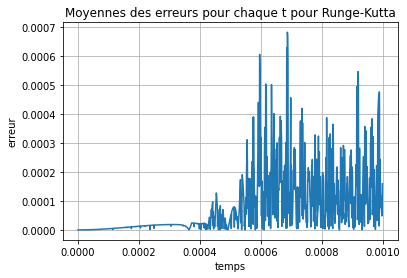

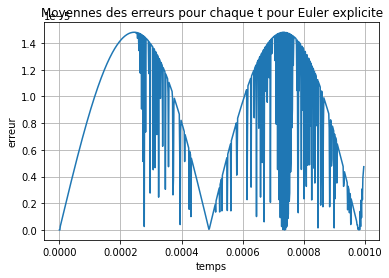

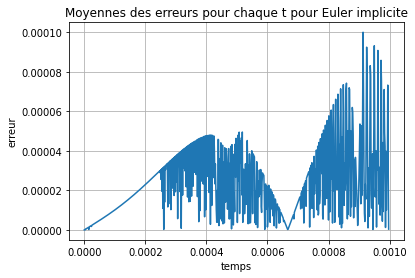

In [8]:

###Moyennes des erreurs pour chaque t pour Runge-Kutta
EE=zeros(Erk.shape[1])
N=np.arange(0,Erk.shape[1]*dt-dt,dt)


for i in range(0,Erk.shape[1]):
  EE[i]=min(Erk[:,[i]])

plt.plot(N,EE)
plt.xlabel("temps")
plt.ylabel("erreur")
plt.title("Moyennes des erreurs pour chaque t pour Runge-Kutta")
plt.grid("True")
plt.show()

###Moyennes des erreurs pour chaque t pour Euler explicite
EE=zeros(Eexp.shape[1])
N=np.arange(0,Eexp.shape[1]*dte,dte)

for i in range(0,Eexp.shape[1]):
  EE[i]=min(Eexp[:,[i]])

plt.plot(N,EE)
plt.xlabel("temps")
plt.ylabel("erreur")
plt.title("Moyennes des erreurs pour chaque t pour Euler explicite")
plt.grid("True")
plt.show()


EE=zeros(Eimp.shape[1])

###Moyennes des erreurs pour chaque t pour Euler implicite
for i in range(0,Eimp.shape[1]):
  EE[i]=min(Eimp[:,[i]])

plt.plot(N,EE)
plt.xlabel("temps")
plt.ylabel("erreur")
plt.title("Moyennes des erreurs pour chaque t pour Euler implicite")
plt.grid("True")
plt.show()


